In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
# Provide the file path
file_path = "C:\\Users\\Hasan\\Desktop\\data science folder\\Copy of Week2_challenge_data_source(CSV).csv"  

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

# Optional: Display all column names
print("Column Names:", data.columns.tolist())

# Display the first few rows
print(data.head())

Column Names: ['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Soc

In [3]:
print(data.info()) # To Identify Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [4]:
print(data.describe()) # To Understand Statistical summary of numerical columns

          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739   

In [5]:
# Count missing values in each column
print(data.isnull().sum())

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [6]:
#Compute Z-scores to identify outliers
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
z_scores = data[numerical_cols].apply(zscore)

# Detect outliers with Z-score threshold
outliers_z = (z_scores.abs() > 3).sum()
print(outliers_z)

Bearer Id                                   0
Start ms                                    0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                   

In [7]:
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

data['Start'] = data['Start'].fillna('Unknown')
data['End'] = data['End'].fillna('Unknown')
data['Last Location Name'] = data['Last Location Name'].fillna('Unknown')
# Verify
print("\nMissing values after filling:")
print(data.isnull().sum())


Missing values after filling:
Bearer Id                                     0
Start                                         0
Start ms                                      0
End                                           0
End ms                                        0
Dur. (ms)                                     0
IMSI                                          0
MSISDN/Number                                 0
IMEI                                          0
Last Location Name                            0
Avg RTT DL (ms)                               0
Avg RTT UL (ms)                               0
Avg Bearer TP DL (kbps)                       0
Avg Bearer TP UL (kbps)                       0
TCP DL Retrans. Vol (Bytes)                   0
TCP UL Retrans. Vol (Bytes)                   0
DL TP < 50 Kbps (%)                           0
50 Kbps < DL TP < 250 Kbps (%)                0
250 Kbps < DL TP < 1 Mbps (%)                 0
DL TP > 1 Mbps (%)                            0
UL TP < 1

In [8]:
#Get the top 10 most used handsets
# Check if 'Handset Type' column exists
if 'Handset Type' in data.columns:
    # Count the frequency of each handset type
    handset_counts = data['Handset Type'].value_counts()
    
    # Get the top 10 most used handsets
    top_10_handsets = handset_counts.head(10)
    
    print("Top 10 Handsets Used by Customers:")
    print(top_10_handsets)
else:
    print("'Handset Type' column not found in the dataset.")


Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


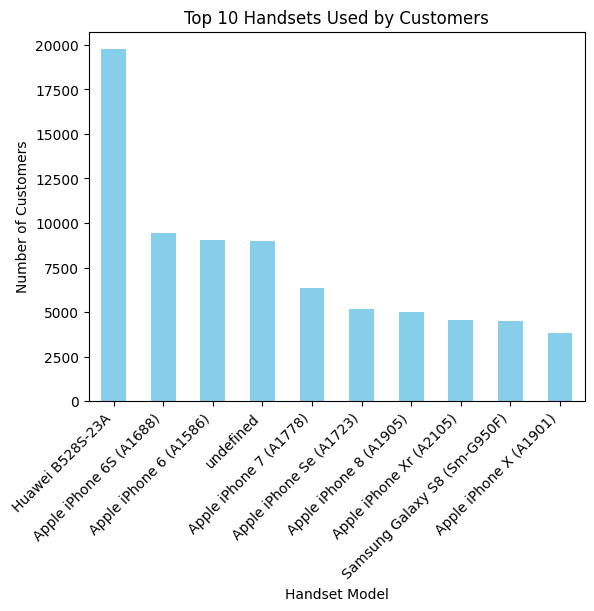

In [9]:
#Draw a bar chart to visualize the top 10 handsets:
# Plot the top 10 handsets
top_10_handsets.plot(kind='bar', color='skyblue')
plt.title("Top 10 Handsets Used by Customers")
plt.xlabel("Handset Model")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, ha="right")
plt.show()

In [10]:
# Extract manufacturer names
manufacturers = handset_counts.index.str.split().str[0]  # Extract first word (e.g., "Apple", "Huawei", "Samsung")

# Create a DataFrame with manufacturer counts
manufacturer_counts = handset_counts.groupby(manufacturers).sum().sort_values(ascending=False)

# Get the top 3 manufacturers
top_3_manufacturers = manufacturer_counts.head(3)

# Display results
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)

Top 3 Handset Manufacturers:
Handset Type
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


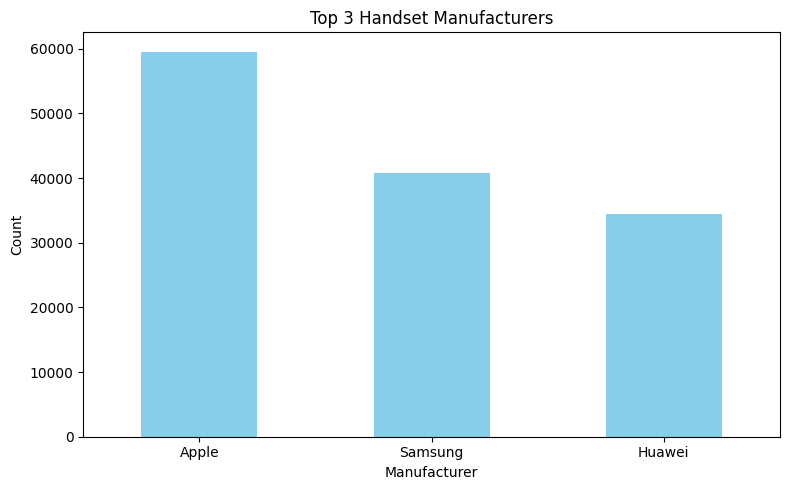

In [11]:
# Plot the results
top_3_manufacturers.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Top 3 Handset Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
# Extract manufacturer names
manufacturers = handset_counts.index.str.split().str[0]  # Extract first word as manufacturer

# Create a DataFrame with manufacturers and handsets
handset_data = pd.DataFrame({
    'Manufacturer': manufacturers,
    'Handset': handset_counts.index,
    'Count': handset_counts.values
})

# Identify top 3 manufacturers
top_3_manufacturers = (
    handset_data.groupby('Manufacturer')['Count']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)

# Filter handsets belonging to the top 3 manufacturers
filtered_handset_data = handset_data[handset_data['Manufacturer'].isin(top_3_manufacturers)]

# Identify top 5 handsets for each manufacture
top_5_per_manufacturer = (
    filtered_handset_data.groupby('Manufacturer', group_keys=False)
    .apply(lambda x: x.sort_values(by='Count', ascending=False).head(5))
)

# Display results
print("Top 5 Handsets per Top 3 Manufacturers:")
print(top_5_per_manufacturer)

Top 5 Handsets per Top 3 Manufacturers:
   Manufacturer                         Handset  Count
1         Apple         Apple iPhone 6S (A1688)   9419
2         Apple          Apple iPhone 6 (A1586)   9023
4         Apple          Apple iPhone 7 (A1778)   6326
5         Apple         Apple iPhone Se (A1723)   5187
6         Apple          Apple iPhone 8 (A1905)   4993
0        Huawei                Huawei B528S-23A  19752
17       Huawei                    Huawei E5180   2079
18       Huawei  Huawei P20 Lite Huawei Nova 3E   2021
22       Huawei                      Huawei P20   1480
31       Huawei                  Huawei Y6 2018    997
8       Samsung    Samsung Galaxy S8 (Sm-G950F)   4520
10      Samsung      Samsung Galaxy A5 Sm-A520F   3724
11      Samsung     Samsung Galaxy J5 (Sm-J530)   3696
12      Samsung     Samsung Galaxy J3 (Sm-J330)   3484
13      Samsung    Samsung Galaxy S7 (Sm-G930X)   3199


C:\Users\Hasan\AppData\Local\Temp\ipykernel_2832\3371717785.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values(by='Count', ascending=False).head(5))


In [13]:
# 1. Aggregate the number of xDR sessions per user
num_sessions = data.groupby('IMSI')['Bearer Id'].nunique().rename('Number_of_Sessions')

# 2. Aggregate the total session duration per user
total_duration = data.groupby('IMSI')['Dur. (ms)'].sum().rename('Total_Session_Duration_ms')

# 3. Aggregate total DL and UL data per user
total_download = data.groupby('IMSI')['Total DL (Bytes)'].sum().rename('Total_Download_Bytes')
total_upload = data.groupby('IMSI')['Total UL (Bytes)'].sum().rename('Total_Upload_Bytes')

# 4. Aggregate total data volume for each application per user
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Calculate total data volume for each application
for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']:
    data[f'{app}_Total_Bytes'] = data[f'{app} DL (Bytes)'] + data[f'{app} UL (Bytes)']

app_columns = [f'{app}_Total_Bytes' for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']]
total_app_data = data.groupby('IMSI')[app_columns].sum()
# Combine all results into one DataFrame
user_summary = pd.concat([num_sessions, total_duration, total_download, total_upload, total_app_data], axis=1)

# Display the final user summary
print("Per-User Aggregated Summary:")
print(user_summary)

Per-User Aggregated Summary:
              Number_of_Sessions  Total_Session_Duration_ms  \
IMSI                                                          
2.040471e+14                   1                   869844.0   
2.040808e+14                   1                   877385.0   
2.082001e+14                   1                    86019.0   
2.082001e+14                   1                    86254.0   
2.082001e+14                   2                   573923.0   
...                          ...                        ...   
2.082099e+14                   1                   127367.0   
2.082099e+14                   1                   168543.0   
2.082099e+14                   1                    86399.0   
2.082522e+14                   1                    56613.0   
2.140743e+14                   1                   226790.0   

              Total_Download_Bytes  Total_Upload_Bytes  \
IMSI                                                     
2.040471e+14            78697597.0 

In [14]:
#Variable Transformations segment Users into Decile Classes Based on Total Session Duration
# Calculate total session duration per user
data['Total_DL_UL'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']  # Total data volume
user_summary = data.groupby('IMSI').agg({
    'Dur. (ms)': 'sum',         # Total session duration
    'Total_DL_UL': 'sum'        # Total data volume
}).rename(columns={'Dur. (ms)': 'Total_Duration_ms', 'Total_DL_UL': 'Total_Data_Volume'})

# Add decile classes based on total session duration
user_summary['Decile'] = pd.qcut(user_summary['Total_Duration_ms'], 10, labels=False) + 1

# Calculate total data volume per decile class
decile_summary = user_summary.groupby('Decile').agg({
    'Total_Duration_ms': 'sum',
    'Total_Data_Volume': 'sum'
}).reset_index()

# Display decile summary
print("Decile Summary:")
print(decile_summary)

# Save decile summary to CSV for reporting
decile_summary.to_csv("decile_summary.csv", index=False)


Decile Summary:
   Decile  Total_Duration_ms  Total_Data_Volume
0       1       2.146076e+08       5.457884e+12
1       2       4.283180e+08       6.106665e+12
2       3       7.565847e+08       6.552653e+12
3       4       1.067191e+09       6.177730e+12
4       5       8.561879e+08       5.070381e+12
5       6       1.255988e+09       6.452502e+12
6       7       1.582163e+09       6.176119e+12
7       8       1.874982e+09       7.844252e+12
8       9       2.492852e+09       9.330766e+12
9      10       5.162514e+09       1.519624e+13


In [15]:
#Non-Graphical Univariate Analysis
# Select quantitative variables
quantitative_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate dispersion parameters
dispersion_metrics = pd.DataFrame({
    'Range': data[quantitative_cols].max() - data[quantitative_cols].min(),
    'Variance': data[quantitative_cols].var(),
    'Standard Deviation': data[quantitative_cols].std(),
    'IQR': data[quantitative_cols].quantile(0.75) - data[quantitative_cols].quantile(0.25)
})

# Display results
print("Dispersion Metrics for Quantitative Variables:")
print(dispersion_metrics)

Dispersion Metrics for Quantitative Variables:
                                                 Range      Variance  \
Bearer Id                                 6.269004e+18  8.315146e+36   
Start ms                                  9.990000e+02  8.329624e+04   
End ms                                    9.990000e+02  8.299970e+04   
Dur. (ms)                                 1.852194e+06  6.567052e+09   
IMSI                                      1.002719e+13  4.599834e+20   
MSISDN/Number                             8.823635e+14  5.947410e+24   
IMEI                                      9.856119e+13  5.005776e+26   
Avg RTT DL (ms)                           9.692300e+04  3.128642e+05   
Avg RTT UL (ms)                           7.120000e+03  5.856831e+03   
Avg Bearer TP DL (kbps)                   3.781600e+05  5.746471e+08   
Avg Bearer TP UL (kbps)                   5.861300e+04  2.139377e+07   
TCP DL Retrans. Vol (Bytes)               4.294426e+09  1.374418e+16   
TCP UL Retrans. V

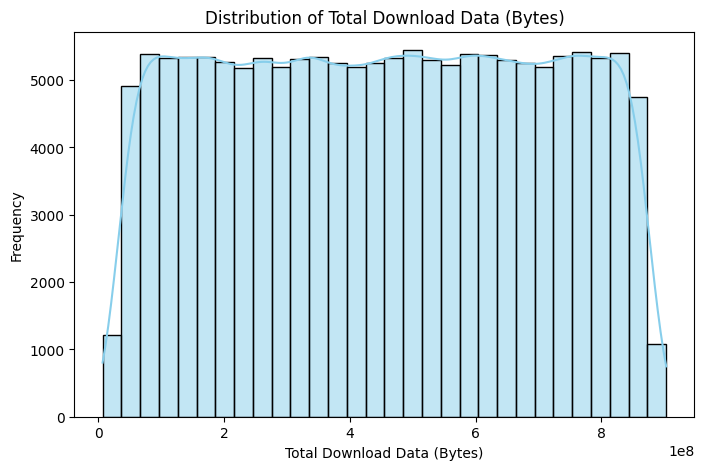

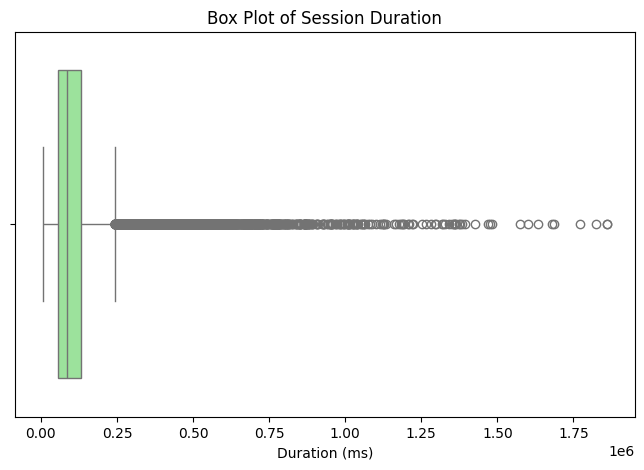

C:\Users\Hasan\AppData\Local\Temp\ipykernel_2832\224849361.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette="viridis")


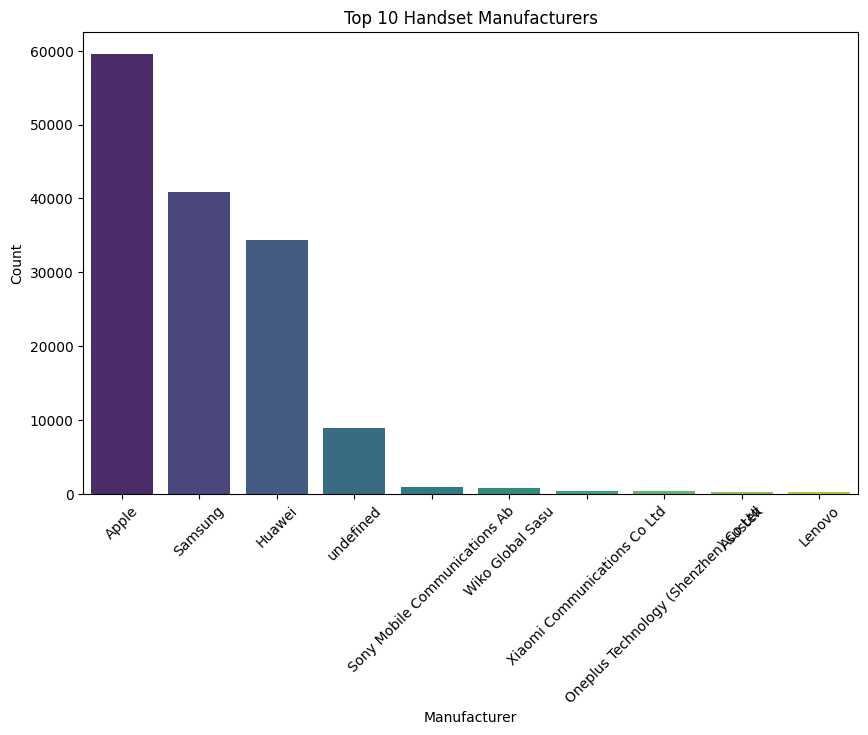

In [16]:
#Graphical Univariate Analysis
# Histogram for Total DL (Bytes)
plt.figure(figsize=(8, 5))
sns.histplot(data['Total DL (Bytes)'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Download Data (Bytes)")
plt.xlabel("Total Download Data (Bytes)")
plt.ylabel("Frequency")
plt.show()

# Box plot for Session Duration
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Dur. (ms)'], color='lightgreen')
plt.title("Box Plot of Session Duration")
plt.xlabel("Duration (ms)")
plt.show()

# Bar plot for Handset Manufacturer
top_manufacturers = data['Handset Manufacturer'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette="viridis")
plt.title("Top 10 Handset Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

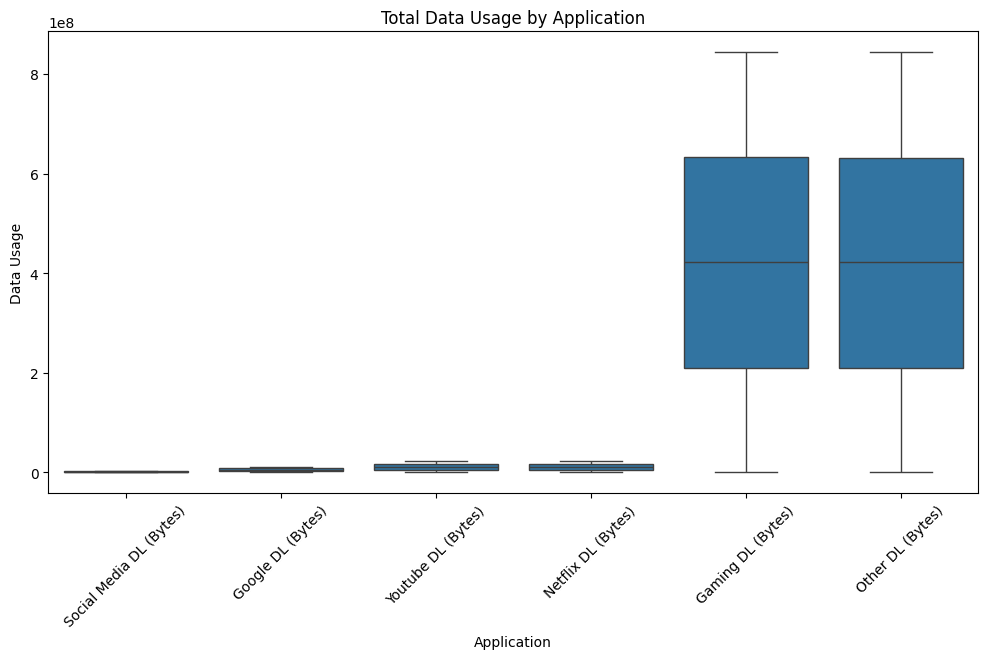

In [18]:
#Boxplot for Total Data Usage by Application
#List of applications for analysis
applications = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)', 
                'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

# Reshape data for plotting
data_melted = data[applications].melt(var_name='Application', value_name='Data Usage')

# Create a boxplot to compare data usage across applications
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application', y='Data Usage', data=data_melted)
plt.title('Total Data Usage by Application')
plt.xticks(rotation=45)
plt.show()